# Cálculo de derivadas numéricas y errores
### Autor: Luis M. de la Cruz Salas
### Rev: 11/02/2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* Aproximación de la primera derivada usando diferencias finitas hacía adelante (Forward):

$\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x)}{h}
$

In [3]:
def forwardFD(u,x,h):
    """ Esquema de diferencias finitas hacia adelante
    u : es la función a evaluar
    x : es la posición
    h : es el tamaño de malla.
    """
    return (u(x+h)-u(x))/h

* Aproximación de la primera derivada usando diferencias finitas hacía atrás (Backward):

$\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x) - u(x-h)}{h}
$

In [4]:
def backwardFD(u,x,h):
    """ Esquema de diferencias finitas hacia atrás
    u : es la función a evaluar
    x : es la posición
    h : es el tamaño de malla.
    """
    return (u(x)-u(x-h))/h

* Aproximación de la primera derivada usando diferencias finitas hacía centradas (Centered):

$\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x-h)}{2h}
$

In [5]:
def centeredFD(u,x,h):
    """ Esquema de diferencias finitas centradas
    u : es la función a evaluar
    x : es la posición
    h : es el tamaño de malla.
    """
    return (u(x+h)-u(x-h))/(2*h)

In [6]:
def u(x):
    """ Esta función es la que deseo evaluar
    """
    return np.sin(x)

In [7]:
def uprime(x):
    """ Esta es la derivada de la función f(x) """
    return np.cos(x)

In [8]:
def error(ue, un):
    return np.fabs(un - ue)

In [11]:
h = np.array([0.1,0.05,0.01,0.005,0.001])
h

array([0.1  , 0.05 , 0.01 , 0.005, 0.001])

In [13]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [14]:
ef = error(uprime(np.ones(5)),forwardFD(u,1,h))
eb = error(uprime(np.ones(5)),backwardFD(u,1,h))
ec = error(uprime(np.ones(5)),centeredFD(u,1,h))
print(ef,eb,ec)

[0.04293855 0.02125749 0.00421632 0.00210592 0.00042083] [0.04113845 0.02080729 0.00419831 0.00210142 0.00042065] [9.00053698e-04 2.25097822e-04 9.00499340e-06 2.25125680e-06
 9.00503947e-08]


In [15]:
import pandas as pd

dframe = pd.DataFrame(np.array([h,ef,eb,ec]))
dframe

,0,1,2,3,4
0,0.100000,0.050000,0.010000,0.005000,1.000000e-03
1,0.042939,0.021257,0.004216,0.002106,4.208255e-04
2,0.041138,0.020807,0.004198,0.002101,4.206454e-04
3,0.000900,0.000225,0.000009,0.000002,9.005039e-08


In [16]:
dframe = pd.DataFrame(np.array([h,ef,eb,ec]).transpose())
dframe

,0,1,2,3
0,0.100,0.042939,0.041138,9.000537e-04
1,0.050,0.021257,0.020807,2.250978e-04
2,0.010,0.004216,0.004198,9.004993e-06
3,0.005,0.002106,0.002101,2.251257e-06
4,0.001,0.000421,0.000421,9.005039e-08


In [17]:
dframe = pd.DataFrame(np.array([h,ef,eb,ec]).transpose(), columns=['$h$','$D_+$', '$D_-$','$D_0$'])
dframe

,$h$,$D_+$,$D_-$,$D_0$
0,0.100,0.042939,0.041138,9.000537e-04
1,0.050,0.021257,0.020807,2.250978e-04
2,0.010,0.004216,0.004198,9.004993e-06
3,0.005,0.002106,0.002101,2.251257e-06
4,0.001,0.000421,0.000421,9.005039e-08


Text(0,0.5,'log(error)')

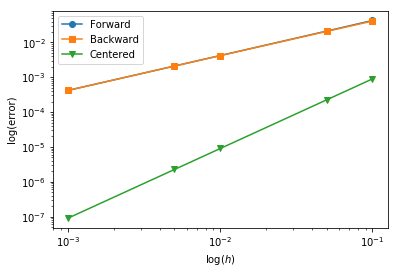

In [18]:
plt.plot(h,ef,'o-',label='Forward')
plt.plot(h,eb,'s-',label='Backward')
plt.plot(h,ec,'v-',label='Centered')
plt.loglog()
plt.legend()
plt.xlabel('log($h$)')
plt.ylabel('log(error)')


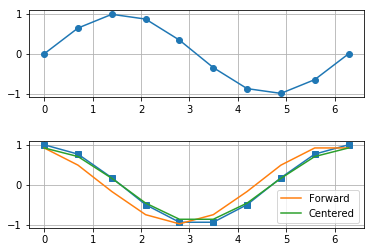

In [20]:
N = 10
A = 0
B = 2 * np.pi
x = np.linspace(A,B,N)
h = (B-A) / (N-1)

plt.subplot(211)
plt.plot(x,u(x),'o-')
plt.grid()

plt.subplot(212)
plt.plot(x,uprime(x),'s-')
plt.plot(x,forwardFD(u,x,h), label='Forward')
plt.plot(x,centeredFD(u,x,h), label='Centered')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.5)
plt.show()
